In [14]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

* Grados (°):
Son la unidad básica para medir ángulos, y se utilizan para indicar la latitud y longitud de un lugar en la Tierra.
* Minutos ('):
Un grado se divide en 60 minutos, lo que significa que 1° = 60'.
* Kilómetros (km):
En el Ecuador, un grado de longitud equivale a aproximadamente 111,32 km. Un minuto de longitud, por otro lado, equivale a aproximadamente 1,85 km. 
* Equivalencia:
Esta equivalencia es importante para entender la extensión real de un ángulo en grados, minutos y segundos en la superficie terrestre. 


Importamos datos raster (.tif)
### Datos WorldClim
Estos son los datos climáticos de WorldClim versión 2.1 para el período 1970-2000. Esta versión se publicó en enero de 2020. Los datos están en resoluciones espaciales de 2.5m (~21.4 km²).

* Variables bioclimáticas: Se incluyen datos de 19 variables bioclimáticas.
Las variables bioclimáticas representan tendencias anuales (p. ej., temperatura media anual, precipitación anual), estacionalidad (p. ej., amplitud térmica anual) y factores ambientales extremos o limitantes (p. ej., temperatura del mes más frío y más cálido, y precipitación de los trimestres húmedo y seco). Un trimestre es un período de tres meses (1/4 del año).

Se codifican de la siguiente manera:

BIO1 = Temperatura media anual

BIO2 = Rango medio diurno (Media mensual (temperatura máxima - temperatura mínima))

BIO3 = Isotermalidad (BIO2/BIO7) (×100)

BIO4 = Estacionalidad de la temperatura (desviación estándar ×100)

BIO5 = Temperatura máxima del mes más cálido

BIO6 = Temperatura mínima del mes más frío

BIO7 = Rango anual de temperatura (BIO5-BIO6)

BIO8 = Temperatura media del trimestre más húmedo

BIO9 = Temperatura media del trimestre más seco

BIO10 = Temperatura media del trimestre más cálido

BIO11 = Temperatura media del trimestre más frío

BIO12 = Precipitación anual

BIO13 = Precipitación del mes más lluvioso

BIO14 = Precipitación del mes más seco

BIO15 = Estacionalidad de la precipitación (coeficiente de variación)

BIO16 = Precipitación del trimestre más húmedo

BIO17 = Precipitación del trimestre más seco

BIO18 = Precipitación del trimestre más cálido

BIO19 = Precipitación del trimestre más frío

Este esquema sigue al de ANUCLIM, excepto que para la estacionalidad de la temperatura se utilizó la desviación estándar porque un coeficiente de variación no tiene sentido con temperaturas entre -1 y 1).

* Utilizando datos de entre 9000 y 60 000 estaciones meteorológicas. Los datos de las estaciones meteorológicas se interpolaron utilizando splines de placa delgada con covariables que incluían elevación, distancia a la costa y tres covariables derivadas de satélite: temperatura máxima y mínima de la superficie terrestre, así como cobertura de nubes, obtenidas con la plataforma satelital MODIS. 

* Fick, S.E. and R.J. Hijmans, 2017. WorldClim 2: new 1km spatial resolution climate surfaces for global land areas. International Journal of Climatology 37 (12): 4302-4315.

In [15]:
gdf = gpd.read_file(r"G:\My Drive\Investigacion2025\Posgrado_Statistics\GeoAnalysis\data\Balso_Departamento.gpkg")
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   ID_ESPACIA                               34 non-null     object  
 1   AREA_OFICI                               34 non-null     float64 
 2   NOMBRE_DPT                               34 non-null     object  
 3   NUMPOINTS                                34 non-null     float64 
 4   elev_mean                                34 non-null     float64 
 5   Temperatura_media_anual_mean             34 non-null     float64 
 6   Precipitacion_anual_mean                 34 non-null     float64 
 7   Rango_medio_diurno_mean                  34 non-null     float64 
 8   Precipitacion_mes_mas_lluvioso_mean      34 non-null     float64 
 9   Precipitacion_mes_mas_seco_mean          34 non-null     float64 
 10  Isotermalidad_mean              

In [17]:
gdf.crs

<Projected CRS: EPSG:9377>
Name: MAGNA-SIRGAS 2018 / Origen-Nacional
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Colombia - onshore and offshore. Includes San Andres y Providencia, Malpelo Islands, Roncador Bank, Serrana Bank and Serranilla Bank.
- bounds: (-84.77, -4.23, -66.87, 15.51)
Coordinate Operation:
- name: Colombia Transverse Mercator
- method: Transverse Mercator
Datum: Marco Geocentrico Nacional de Referencia 2018
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
gdf = gdf.rename(columns={'NOMBRE_DPT': 'departamento', 
                    'AREA_OFICI': 'area',
                    'NUMPOINTS': 'conteo'})
gdf.head(3)


,ID_ESPACIA,area,departamento,conteo,elev_mean,Temperatura_media_anual_mean,Precipitacion_anual_mean,Rango_medio_diurno_mean,Precipitacion_mes_mas_lluvioso_mean,Precipitacion_mes_mas_seco_mean,Isotermalidad_mean,Estacionalidad_de_la_temperatura_mean,Rango_anual_de_temperatura_mean,Estacionalidad_de_la_precipitacion_mean,geometry
0,11,1605.0,BOGOTÁ,0.0,3223.298701,9.803929,1266.961039,9.179502,168.558442,39.285714,80.775546,35.473980,11.352364,38.033142,"MULTIPOLYGON (((4881435.89 2091783.395, 488145..."
1,13,26383.0,BOLÍVAR,32.0,263.826877,26.778483,2270.948617,9.940637,355.376285,29.230040,83.090072,42.905979,12.014608,59.258936,"MULTIPOLYGON (((4753419.752 2752315.572, 47534..."
2,15,23189.0,BOYACÁ,6.0,2262.947658,15.462887,1776.909091,9.494651,279.260790,36.449036,80.130047,43.557213,11.859600,53.210623,"MULTIPOLYGON (((5092792.513 2336225.178, 50929..."


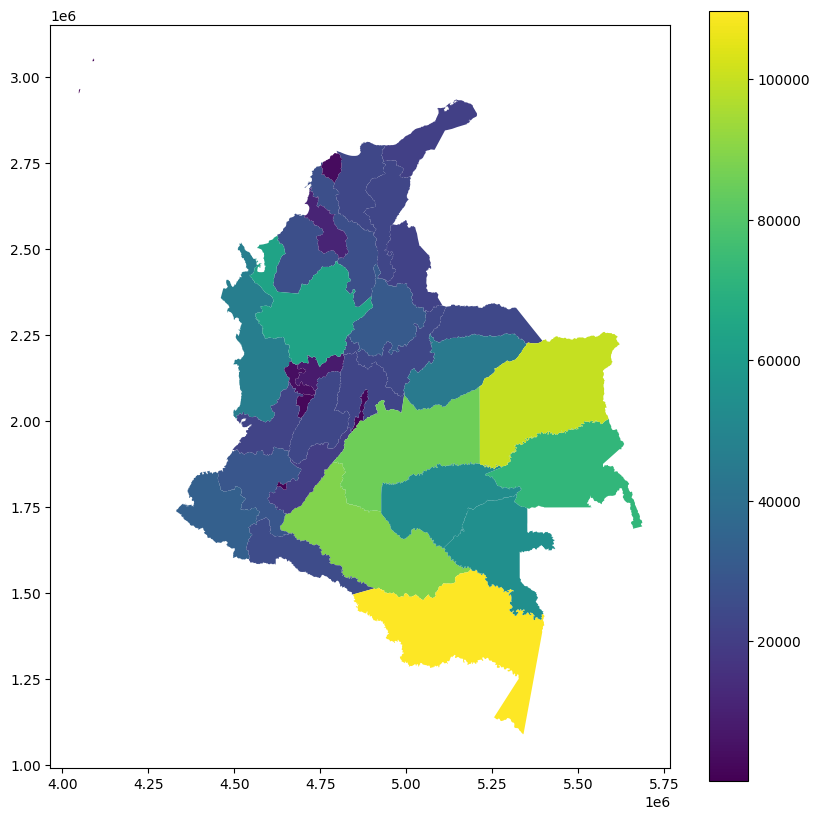

In [72]:
f, ax = plt.subplots(1, figsize=(10, 10))
gdf.plot(column='area', legend=True, ax=ax)
plt.show()

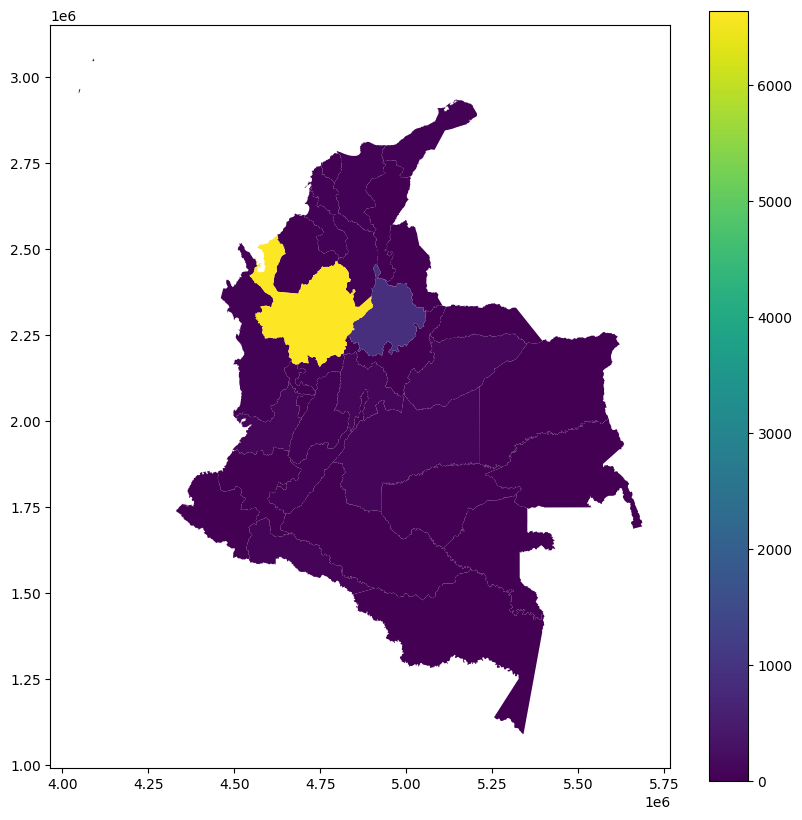

In [21]:
f, ax = plt.subplots(1, figsize=(10, 10))
gdf.plot(column='conteo', legend=True, ax=ax)
plt.show()

Identificamos datos outliers. Ojo. Antioquia es un outliers. Por el proyecto Hidroeléctrico Hidroituago, se realizó actividades de caraterización de flora en algunos municipios de Antioquia, eso favorece el alto número de reportes para la zona con respecto a otros territorio de Colombia.

Antioquia no necesariamente representa una abundancia mayor sino un esfuerzo de muestreo mayor

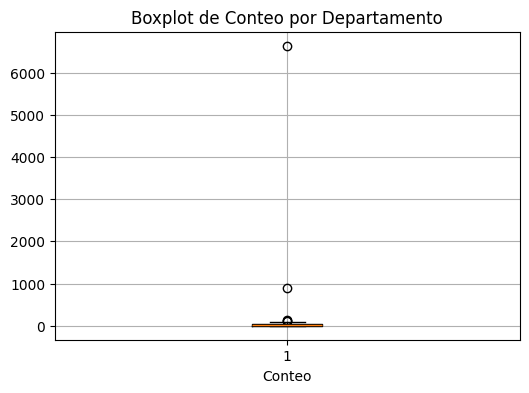

In [68]:
# Boxplot de la variable 'conteo'
plt.figure(figsize=(6, 4))
plt.boxplot(gdf['conteo'])
plt.xlabel('Conteo')
plt.title('Boxplot de Conteo por Departamento')
plt.grid(True)
plt.show()

# Distribución normal (Regresión lineal Gaussiana)
R-squared: 0.473. La elevación y la temperatura son estadísticamente significativas. 

In [22]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Preparar datos
gdf["y_log"] = np.log(gdf['conteo'] + 1)
var = ['elev_mean',
       'Temperatura_media_anual_mean', 'Precipitacion_anual_mean',
       'Rango_medio_diurno_mean', 'Precipitacion_mes_mas_lluvioso_mean',
       'Precipitacion_mes_mas_seco_mean', 'Isotermalidad_mean',
       'Estacionalidad_de_la_temperatura_mean',
       'Rango_anual_de_temperatura_mean',
       'Estacionalidad_de_la_precipitacion_mean']

# Escalar variables
st = StandardScaler()
X_scaled = st.fit_transform(gdf[var])

# Añadir una constante para el término de intercepción en el modelo
X = sm.add_constant(X_scaled)
y = gdf['y_log']

# Entrenar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Imprimir un resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  y_log   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     2.067
Date:                Tue, 24 Jun 2025   Prob (F-statistic):             0.0726
Time:                        14:23:10   Log-Likelihood:                -59.585
No. Observations:                  34   AIC:                             141.2
Df Residuals:                      23   BIC:                             158.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7670      0.291      9.506      0.0

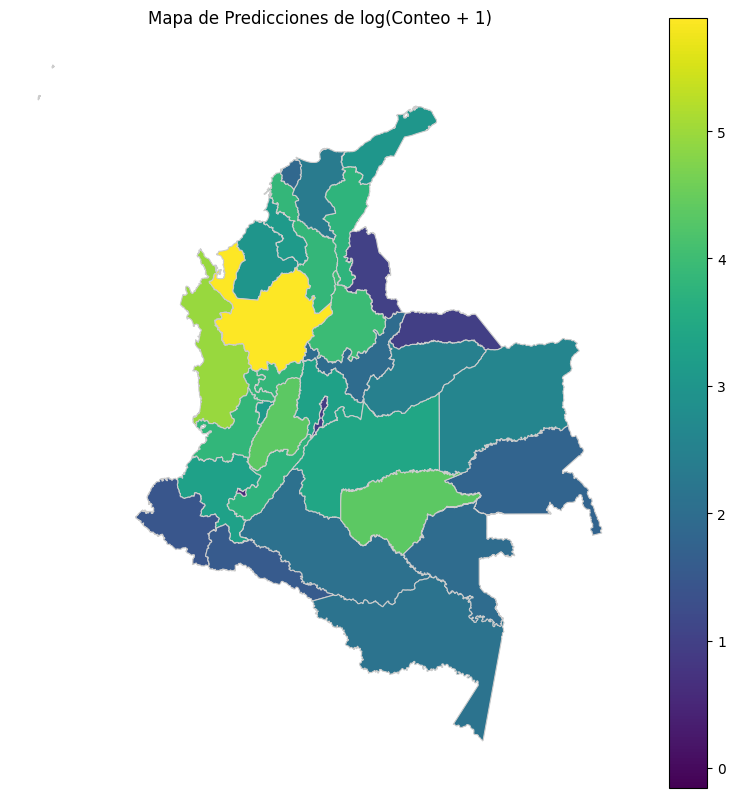

In [23]:
# Obtener las predicciones
y_pred = model.predict(X)

# Añadir las predicciones al GeoDataFrame
gdf['y_pred'] = y_pred

# Graficar el mapa con los valores de predicción
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='y_pred', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Mapa de Predicciones de log(Conteo + 1)')
ax.set_axis_off()
plt.show()

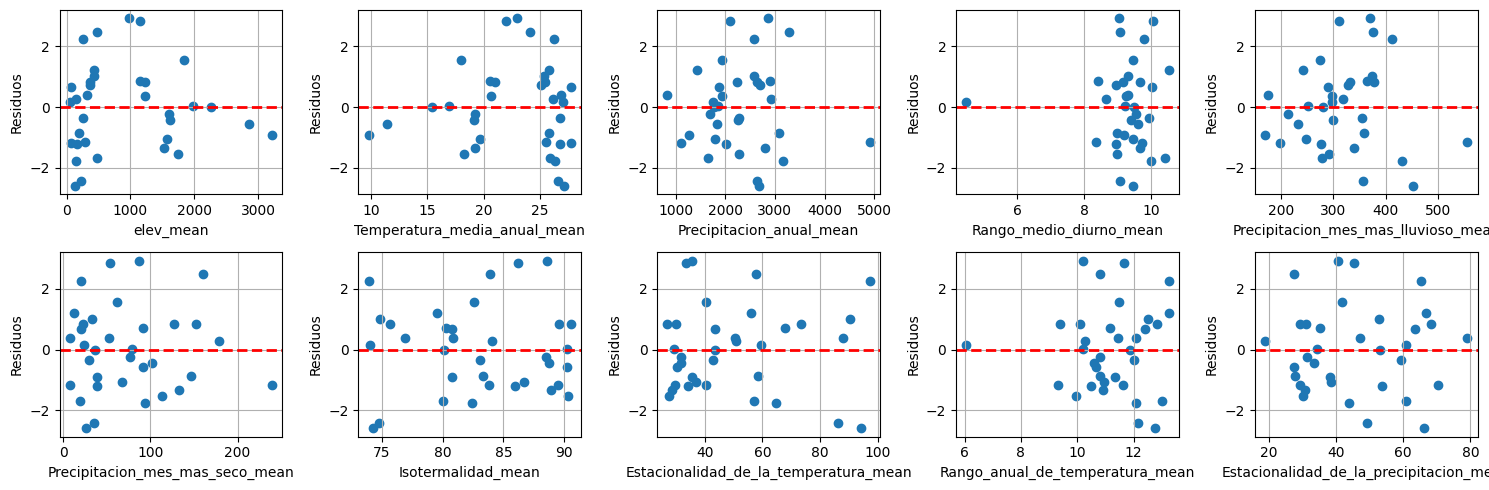

In [24]:
# Calcular los residuos
residuals = y - y_pred

# Crear las figuras scatter para comparar los residuos con cada variable X
plt.figure(figsize=(15, 5))

for i, variable in enumerate(var):
    plt.subplot(2, 5, i + 1)
    plt.scatter(gdf[variable], residuals)
    plt.axhline(y=0, color='r', linestyle='--', lw=2)
    plt.xlabel(variable)
    plt.ylabel('Residuos')
    #plt.title(f'Residuos vs. {variable}')
    plt.grid(True)

plt.tight_layout()
plt.show()

# Distribución de Poisson (para los modelos de regresión de Poisson)

In [5]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
from sklearn.preprocessing import StandardScaler

# Preparar datos para regresión de Poisson con offset por área
y = gdf['conteo']
var = ['elev_mean',
       'Temperatura_media_anual_mean', 'Precipitacion_anual_mean',
       'Rango_medio_diurno_mean', 'Precipitacion_mes_mas_lluvioso_mean',
       'Precipitacion_mes_mas_seco_mean', 'Isotermalidad_mean',
       'Estacionalidad_de_la_temperatura_mean',
       'Rango_anual_de_temperatura_mean',
       'Estacionalidad_de_la_precipitacion_mean']  # No incluimos 'area' como predictor directamente ahora
exposure = np.log(gdf['area'])  # Logaritmo del área como medida de exposición

# Escalar variables independientes (excepto el área que se usa como offset)
st = StandardScaler()
X_scaled = st.fit_transform(gdf[var])

# Añadir una constante para el término de intercepción
X = sm.add_constant(X_scaled)

# Entrenar el modelo de regresión de Poisson con offset
poisson_model_offset = GLM(y, X, family=families.Poisson(), offset=exposure).fit()

# Imprimir un resumen del modelo de regresión de Poisson con offset
print(poisson_model_offset.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 conteo   No. Observations:                   34
Model:                            GLM   Df Residuals:                       23
Model Family:                 Poisson   Df Model:                           10
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1077.6
Date:                Tue, 24 Jun 2025   Deviance:                       2010.2
Time:                        11:01:06   Pearson chi2:                 4.42e+03
No. Iterations:                     8   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.2088      0.061   -118.296      0.0

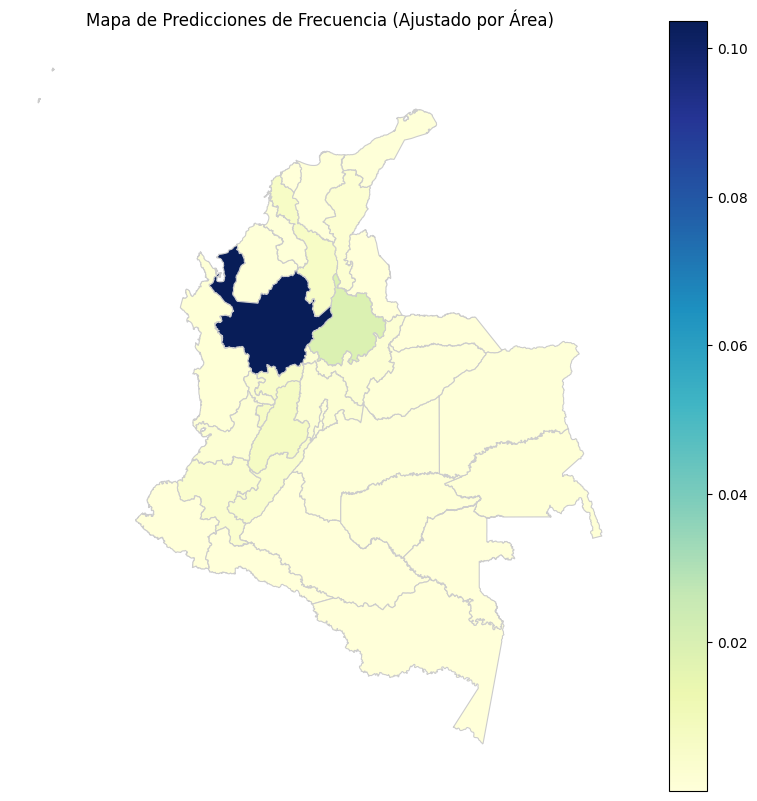

In [6]:
# Obtener las predicciones de frecuencia (ahora representan la frecuencia ajustada por el área)
y_pred_freq_offset = poisson_model_offset.predict(X)

# Añadir las predicciones al GeoDataFrame
gdf['predicted_lands_rec_offset'] = y_pred_freq_offset

# Calcular la diferencia entre el valor real y la predicción con offset
gdf['difference_lands_rec_offset'] = gdf['conteo'] - gdf['predicted_lands_rec_offset']

# Graficar el mapa con los valores de predicción de frecuencia ajustados por área
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='predicted_lands_rec_offset', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Mapa de Predicciones de Frecuencia (Ajustado por Área)')
ax.set_axis_off()
plt.show()

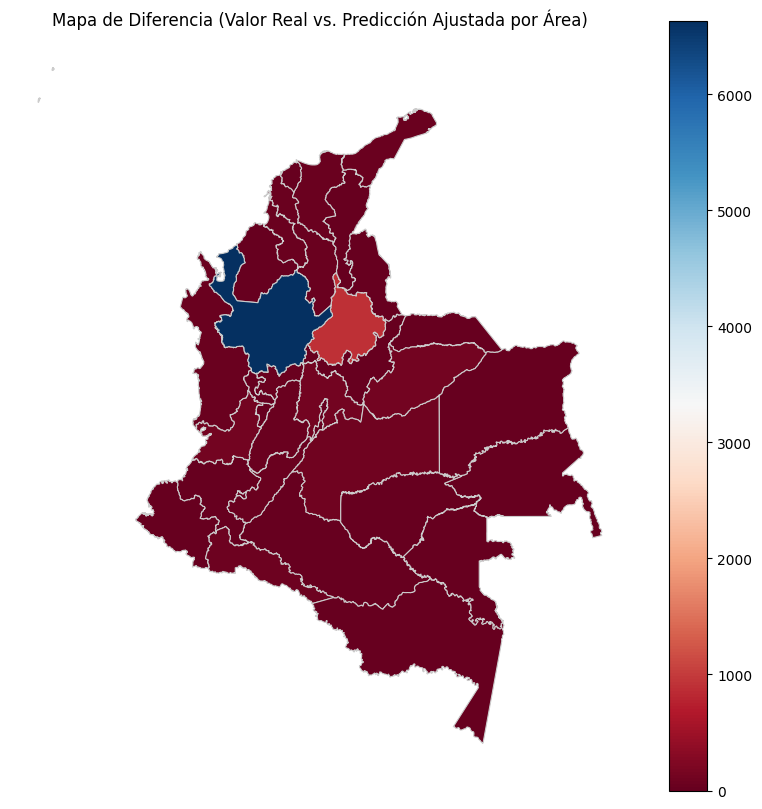

In [7]:
# Graficar el mapa con la diferencia entre el valor real y la predicción ajustada por área
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='difference_lands_rec_offset', cmap='RdBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Mapa de Diferencia (Valor Real vs. Predicción Ajustada por Área)')
ax.set_axis_off()
plt.show()

# Distribución Binomial Negativa (para modelos de regresión binomial negativa)



In [11]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
from sklearn.preprocessing import StandardScaler

# Preparar datos para regresión binomial negativa con offset por área
y = gdf['conteo']
var = ['elev_mean',
       'Temperatura_media_anual_mean', 'Precipitacion_anual_mean',
       'Rango_medio_diurno_mean', 'Precipitacion_mes_mas_lluvioso_mean',
       'Precipitacion_mes_mas_seco_mean', 'Isotermalidad_mean',
       'Estacionalidad_de_la_temperatura_mean',
       'Rango_anual_de_temperatura_mean',
       'Estacionalidad_de_la_precipitacion_mean']   # No incluimos 'area' como predictor directamente ahora
exposure = np.log(gdf['area'])  # Logaritmo del área como medida de exposición

# Escalar variables independientes (excepto el área que se usa como offset)
st = StandardScaler()
X_scaled = st.fit_transform(gdf[var])

# Añadir una constante para el término de intercepción
X = sm.add_constant(X_scaled)

# Entrenar el modelo de regresión binomial negativa con offset
negative_binomial_model_offset = GLM(y, X, family=families.NegativeBinomial(), offset=exposure).fit()

# Imprimir un resumen del modelo de regresión binomial negativa con offset
print(negative_binomial_model_offset.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 conteo   No. Observations:                   34
Model:                            GLM   Df Residuals:                       23
Model Family:        NegativeBinomial   Df Model:                           10
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -150.14
Date:                Tue, 24 Jun 2025   Deviance:                       57.029
Time:                        11:01:32   Pearson chi2:                     36.1
No. Iterations:                    37   Pseudo R-squ. (CS):             0.9076
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.7662      0.235    -28.748      0.0

c:\Users\Valentina Cardona\anaconda3\envs\GeoAnalysis\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


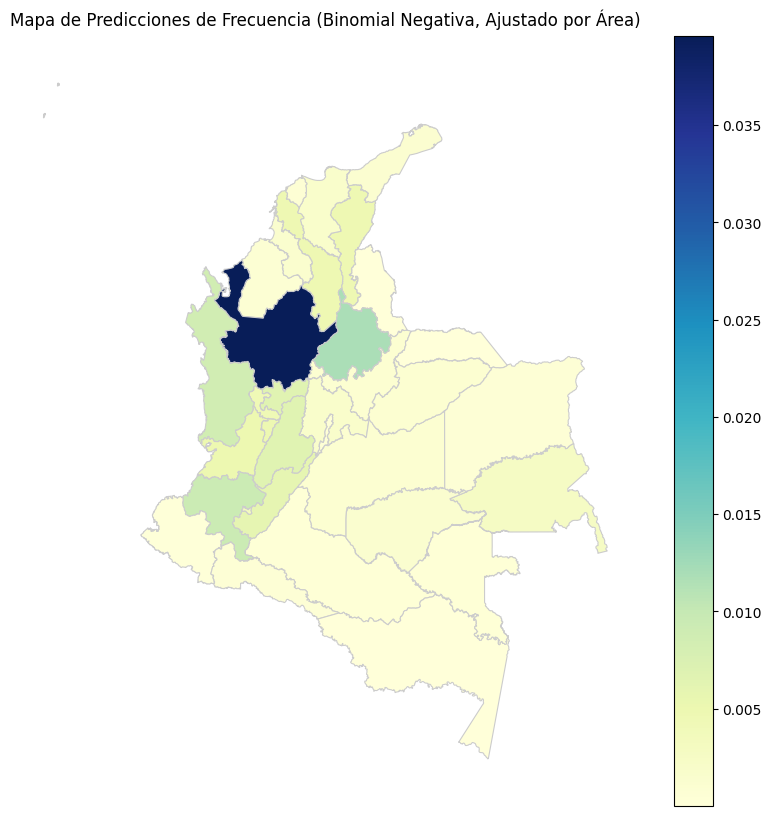

In [12]:
# Obtener las predicciones de frecuencia (ahora representan la frecuencia ajustada por el área)
y_pred_freq_offset_nb = negative_binomial_model_offset.predict(X)

# Añadir las predicciones al GeoDataFrame
gdf['predicted_lands_rec_offset_nb'] = y_pred_freq_offset_nb

# Calcular la diferencia entre el valor real y la predicción con offset (Binomial Negativa)
gdf['difference_lands_rec_offset_nb'] = gdf['conteo'] - gdf['predicted_lands_rec_offset_nb']

# Graficar el mapa con los valores de predicción de frecuencia ajustados por área (Binomial Negativa)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='predicted_lands_rec_offset_nb', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Mapa de Predicciones de Frecuencia (Binomial Negativa, Ajustado por Área)')
ax.set_axis_off()
plt.show()

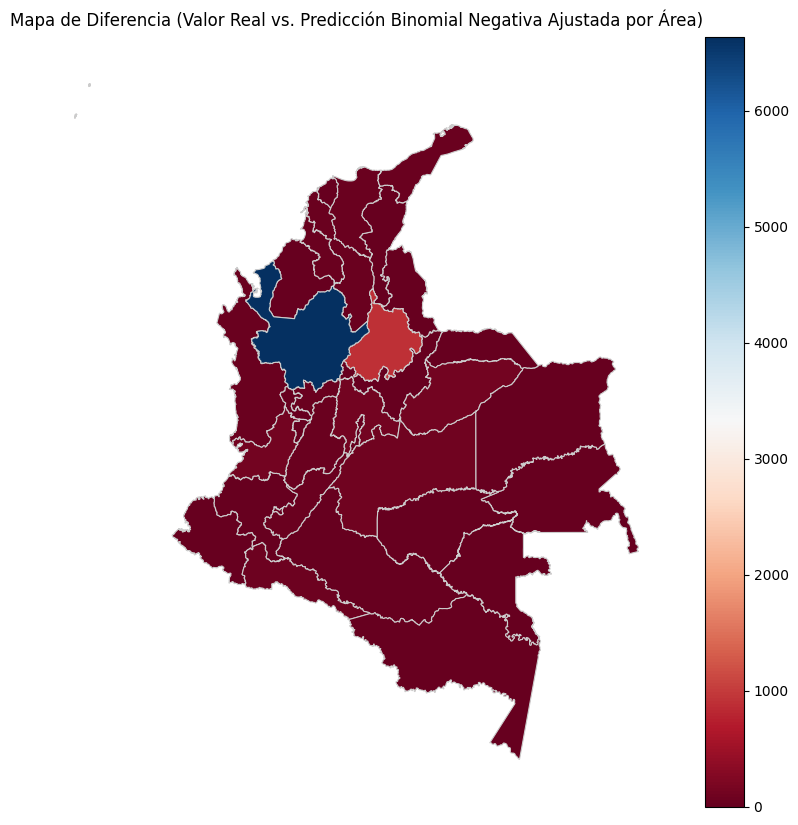

In [13]:
# Graficar el mapa con la diferencia entre el valor real y la predicción ajustada por área (Binomial Negativa)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='difference_lands_rec_offset_nb', cmap='RdBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Mapa de Diferencia (Valor Real vs. Predicción Binomial Negativa Ajustada por Área)')
ax.set_axis_off()
plt.show()

# Visualización de datos discretos

In [28]:
gdf.columns

Index(['ID_ESPACIA', 'area', 'departamento', 'conteo', 'elev_mean',
       'Temperatura_media_anual_mean', 'Precipitacion_anual_mean',
       'Rango_medio_diurno_mean', 'Precipitacion_mes_mas_lluvioso_mean',
       'Precipitacion_mes_mas_seco_mean', 'Isotermalidad_mean',
       'Estacionalidad_de_la_temperatura_mean',
       'Rango_anual_de_temperatura_mean',
       'Estacionalidad_de_la_precipitacion_mean', 'geometry', 'y_log',
       'y_pred'],
      dtype='object')

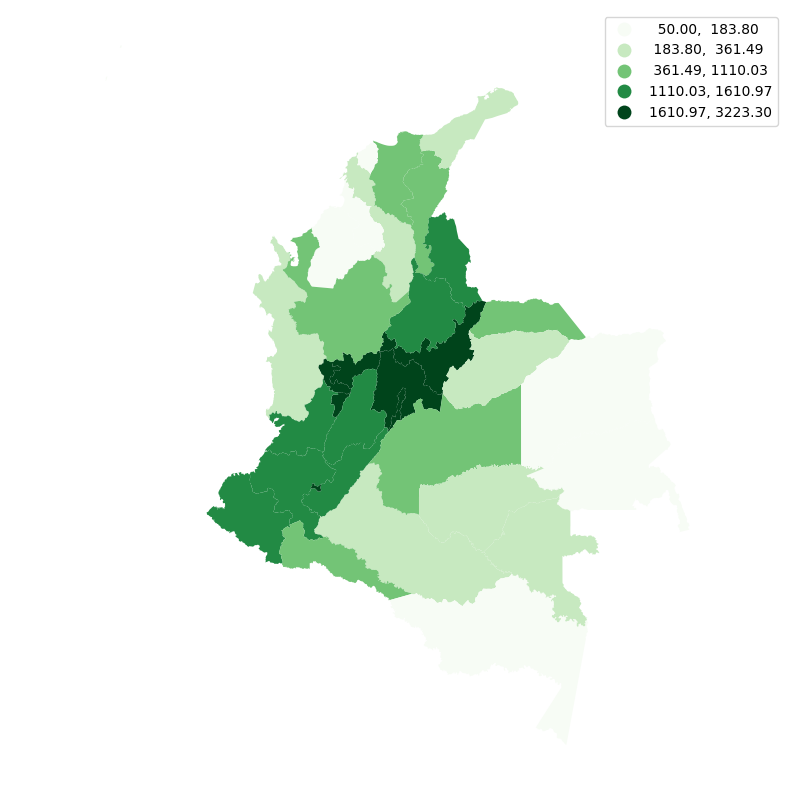

In [36]:
f, ax = plt.subplots(1, figsize=(10,10))
gdf.plot(ax=ax, column='elev_mean', legend=True, scheme='Quantiles', legend_kwds={'fmt':'{:.2f}'}, cmap='Greens')
ax.set_axis_off()
plt.axis('equal')
plt.show()

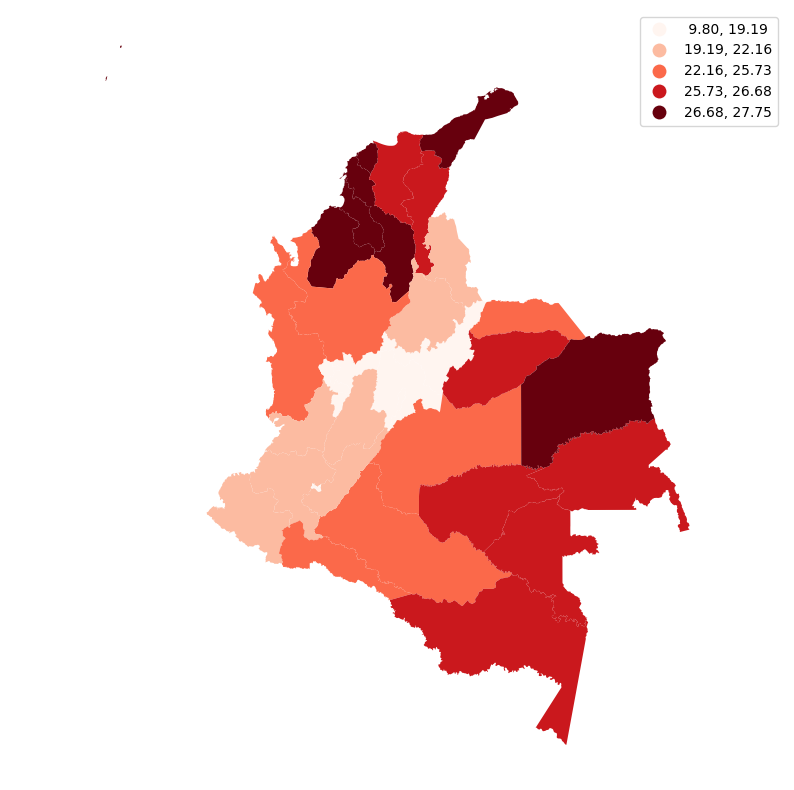

In [37]:
f, ax = plt.subplots(1, figsize=(10,10))
gdf.plot(ax=ax, column='Temperatura_media_anual_mean', legend=True, scheme='Quantiles', legend_kwds={'fmt':'{:.2f}'}, cmap='Reds')
ax.set_axis_off()
plt.axis('equal')
plt.show()

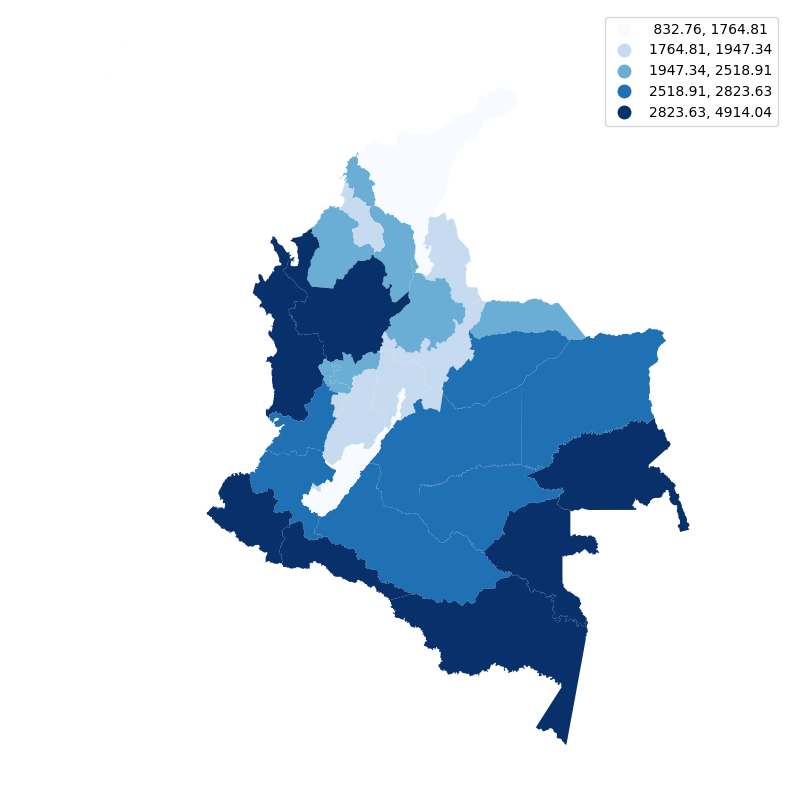

In [35]:
f, ax = plt.subplots(1, figsize=(10,10))
gdf.plot(ax=ax, column='Precipitacion_anual_mean', legend=True, scheme='Quantiles', legend_kwds={'fmt':'{:.2f}'}, cmap='Blues')
ax.set_axis_off()
plt.axis('equal')
plt.show()

# Matriz espacial
La autocorrelación espacial relaciona el valor de la variable de interés en una ubicación dada con los valores de la misma variable en ubicaciones circundantes.

Una idea clave en este contexto es la de aleatoriedad espacial: una situación en la que la ubicación de una observación no proporciona ninguna información sobre su valor. En otras palabras, una variable es espacialmente aleatoria si se distribuye sin seguir un patrón discernible sobre el espacio. Por lo tanto, la autocorrelación espacial puede definirse formalmente como la “ausencia de aleatoriedad espacial”.

### 1. Matriz de pesos

La herramienta fundamental para evaluar la relación espacial entre observaciones corresponde a la matriz espacial de pesos. La matriz de pesos W tiene dimensiones n, donde n es el número total de observaciones. Cada entrada de la matriz W, corresponde a un valor que representa el grado espacial de contacto o interacción entre los valores (ij). Por convención, la diagonal de W son ceros.

* Matriz de pesos basada en contiguidad: Considera dos observaciones como vecinas si comparten frontera.

* Matriz de pesos basada en distancias


### 2. Spatial lag (rezago espacial)
El spatial lag de una variable es el producto de la matriz de pesos con la variable misma.

### 3. Autocorrelación espacial global 

El valor del Índice de Moran corresponde con la pendiente de la ajuste lineal superpuesto en el Gráfico de Moran (Moran’s I es una buena herramienta para resumir un conjunto de datos en un único valor que informa sobre su grado de agrupamiento geográfico)

La otra información que extraeremos del Índice de Moran se relaciona con la inferencia estadística: ¿qué tan probable es que el patrón que observamos en el mapa y que captura en su valor el Índice de Moran sea generado por un proceso completamente aleatorio?. Un valor p lo suficientemente pequeño asociado con el Índice de Moran de un mapa permite rechazar la hipótesis de que el mapa es aleatorio. En otras palabras, podemos concluir que el mapa muestra más patrón espacial de lo que esperaríamos si los valores se hubieran asignado aleatoriamente a una ubicación particular.

### 4. Autocorrelación espacial local

 Las medidas locales consideran cada observación individual y operan sobre ellas, en contraposición al conjunto de datos en su conjunto, como lo hacen las medidas globales.
 Consideramos los Indicadores Locales de Asociación Espacial (LISAs), un contraparte local de medidas globales como Moran’s I. En el núcleo de este método hay una clasificación de las observaciones en un conjunto de datos en cuatro grupos derivados del Gráfico de Moran: valores altos rodeados de valores altos (HH), valores bajos cerca de otros valores bajos (LL), valores altos entre valores bajos (HL), y viceversa (LH). 

### Ejemplo. MATRIZ DE PESOS BASADA EN CONTIGUIDAD

In [38]:
from pysal.lib import weights
import pandas as pd
import geopandas as gpd

# Create the spatial weights matrix
w_queen = weights.Queen.from_dataframe(gdf, idVariable='departamento')
w_queen

In [39]:
w_queen.islands #San Andrés es la única isla

['ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA']

In [40]:
#Eliminamos las islas
gdf = gdf[~gdf['departamento'].isin(w_queen.islands)]

In [41]:
# Create the spatial weights matrix
w_queen = weights.Queen.from_dataframe(gdf, idVariable='departamento')
w_queen

# Row standardize the matrix
w_queen.transform = 'R'

# Para conocer el número de vecinos de cada departamento
import pandas as pd
queen_card = pd.Series(w_queen.cardinalities)
queen_card


BOGOTÁ                3
BOLÍVAR               7
BOYACÁ                8
CALDAS                5
CAQUETÁ               7
CAUCA                 7
CESAR                 5
CÓRDOBA               3
CUNDINAMARCA          7
CHOCÓ                 3
HUILA                 7
LA GUAJIRA            2
MAGDALENA             4
META                  8
NARIÑO                2
NORTE DE SANTANDER    3
QUINDIO               3
RISARALDA             6
SANTANDER             5
SUCRE                 2
TOLIMA                7
VALLE DEL CAUCA       5
ARAUCA                3
CASANARE              5
PUTUMAYO              4
AMAZONAS              3
GUAINIA               3
GUAVIARE              5
VAUPES                4
VICHADA               5
NN                    2
ANTIOQUIA             7
ATLANTICO             2
dtype: int64

* Evaluación de los conteos

In [42]:

gdf['w_conteo'] = weights.lag_spatial(w_queen, gdf['conteo'])

gdf[['departamento', 'conteo', 'w_conteo']]

,departamento,conteo,w_conteo
0,BOGOTÁ,0.0,81.333333
1,BOLÍVAR,32.0,1087.142857
2,BOYACÁ,6.0,984.625000
3,CALDAS,29.0,1361.200000
4,CAQUETÁ,15.0,28.000000
5,CAUCA,6.0,34.571429
6,CESAR,7.0,196.000000
7,CÓRDOBA,5.0,2237.666667
8,CUNDINAMARCA,127.0,40.857143
9,CHOCÓ,44.0,2250.333333


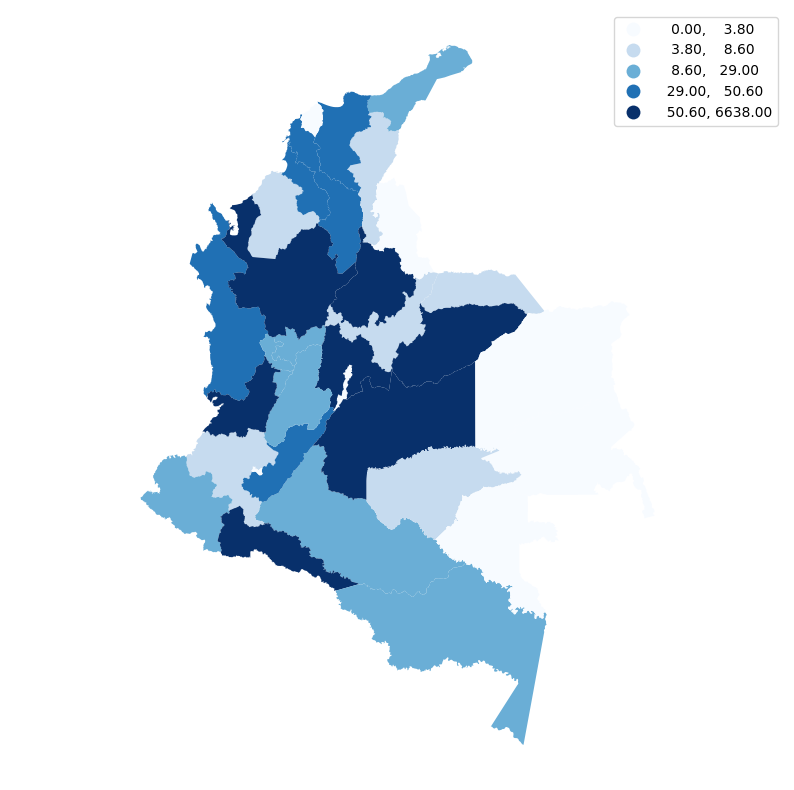

In [48]:
f, ax = plt.subplots(1, figsize=(10,10))
gdf.plot(ax=ax, column='conteo', legend=True, scheme='Quantiles', legend_kwds={'fmt':'{:.2f}'}, cmap='Blues')
ax.set_axis_off()
plt.axis('equal')
plt.show()

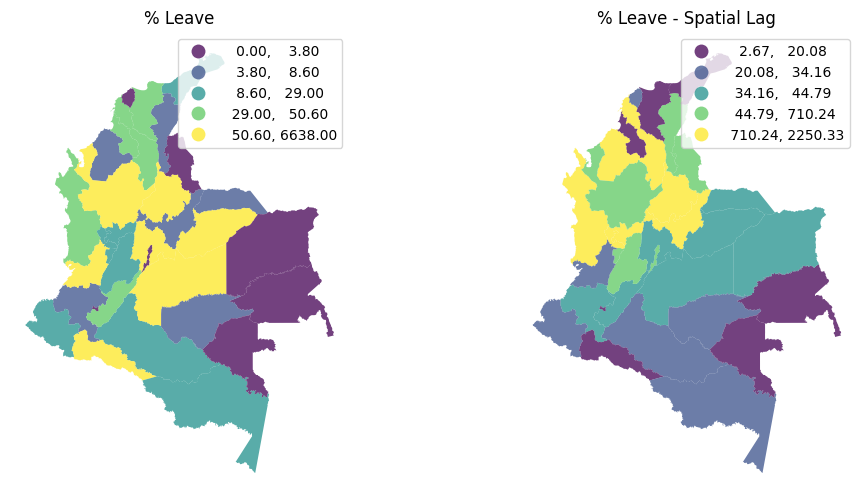

In [245]:
f, axs = plt.subplots(1, 2, figsize=(12, 6))
ax1, ax2 = axs
gdf.plot(column='conteo', cmap='viridis', scheme='quantiles',k=5, edgecolor='white', linewidth=0., alpha=0.75, legend=True, ax=ax1)
ax1.set_axis_off()
ax1.set_title("% Leave")
gdf.plot(column='w_conteo', cmap='viridis', scheme='quantiles',k=5, edgecolor='white', linewidth=0., alpha=0.75, legend=True, ax=ax2)
ax2.set_axis_off()
ax2.set_title("% Leave - Spatial Lag")
plt.show()

In [ ]:
import esda
from splot.esda import plot_moran

mi = esda.Moran(gdf['conteo'], w_queen)
plot_moran(mi);

* Evaluación de la temperatura

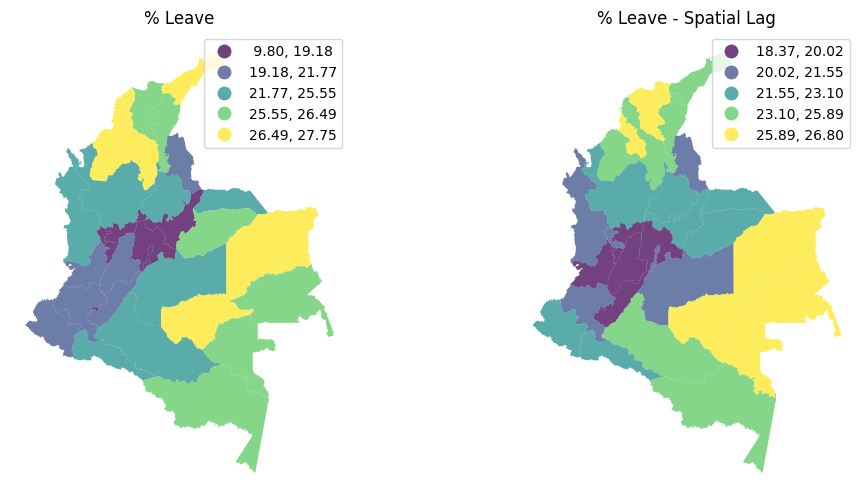

In [246]:
gdf['w_Temperatura_media_anual_mean'] = weights.lag_spatial(w_queen, gdf['Temperatura_media_anual_mean'])

gdf[['departamento', 'Temperatura_media_anual_mean', 'w_Temperatura_media_anual_mean']]

f, axs = plt.subplots(1, 2, figsize=(12, 6))
ax1, ax2 = axs
gdf.plot(column='Temperatura_media_anual_mean', cmap='viridis', scheme='quantiles',k=5, edgecolor='white', linewidth=0., alpha=0.75, legend=True, ax=ax1)
ax1.set_axis_off()
ax1.set_title("% Leave")
gdf.plot(column='w_Temperatura_media_anual_mean', cmap='viridis', scheme='quantiles',k=5, edgecolor='white', linewidth=0., alpha=0.75, legend=True, ax=ax2)
ax2.set_axis_off()
ax2.set_title("% Leave - Spatial Lag")
plt.show()

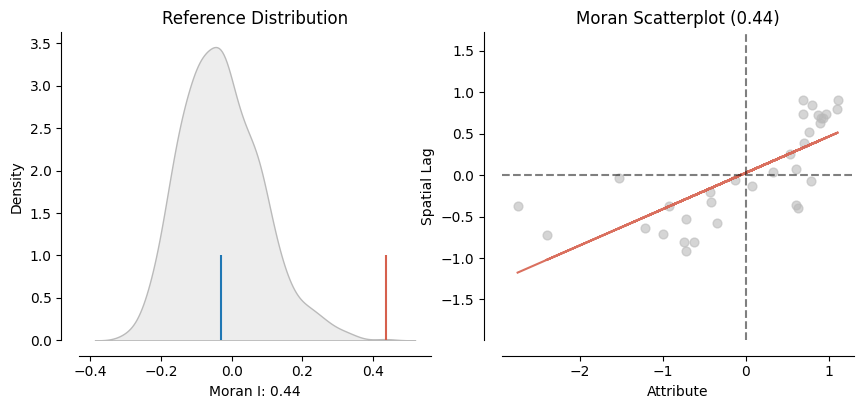

In [47]:
import esda
from splot.esda import plot_moran

mi = esda.Moran(gdf['Temperatura_media_anual_mean'], w_queen)
plot_moran(mi);

### Ejemplo. MATRIZ DE PESOS BASADA EN DISTANCIA

250km de distancia, es la distancia mínima donde solo se encuentra una isla.

In [247]:
import geopandas as gpd
import requests
from io import BytesIO
from libpysal.weights import DistanceBand

# Create a DistanceBand weights matrix
w_dist270km = DistanceBand.from_dataframe(gdf, 270000, binary=False)

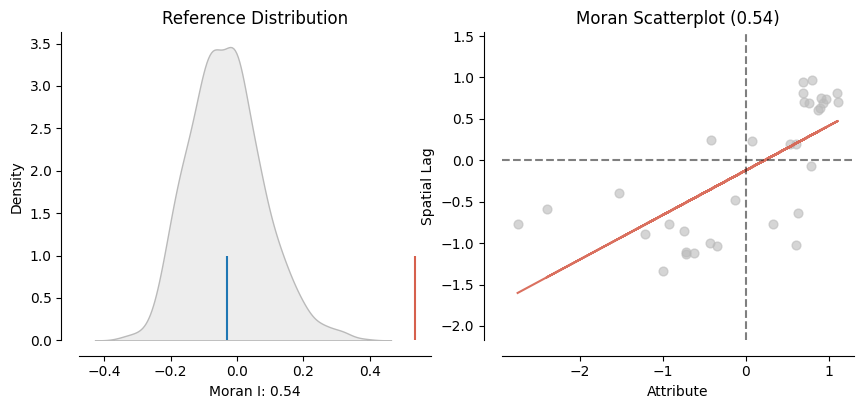

In [248]:
import esda
from splot.esda import plot_moran

mi = esda.Moran(gdf['Temperatura_media_anual_mean'], w_dist270km)
plot_moran(mi);

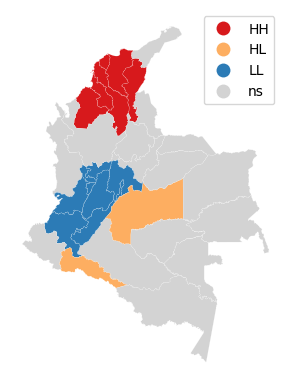

In [249]:
from splot.esda import lisa_cluster

lisa = esda.Moran_Local(gdf['Temperatura_media_anual_mean'], w_dist270km)
lisa_cluster(lisa, gdf);

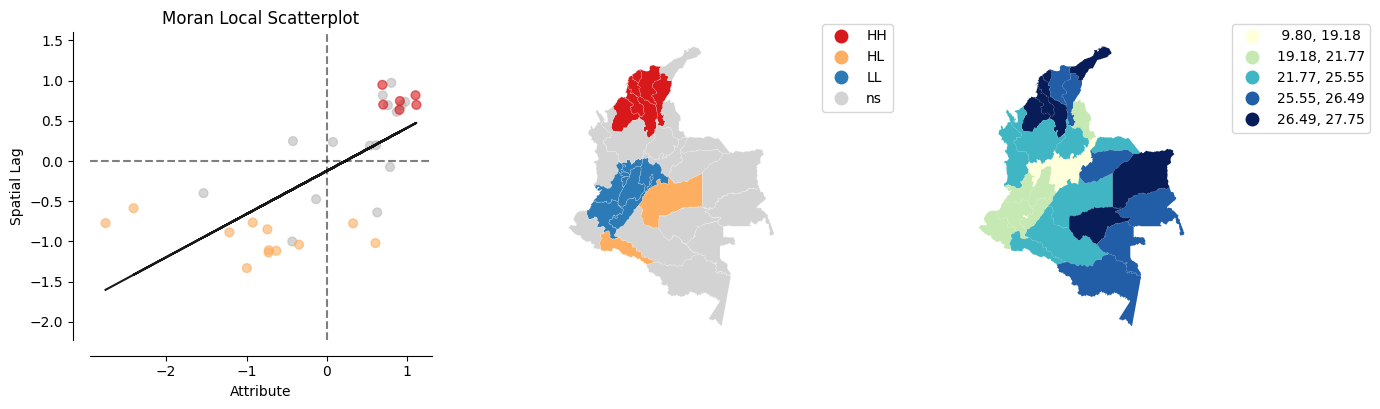

In [250]:
from splot.esda import plot_local_autocorrelation

plot_local_autocorrelation(lisa, gdf, 'Temperatura_media_anual_mean');

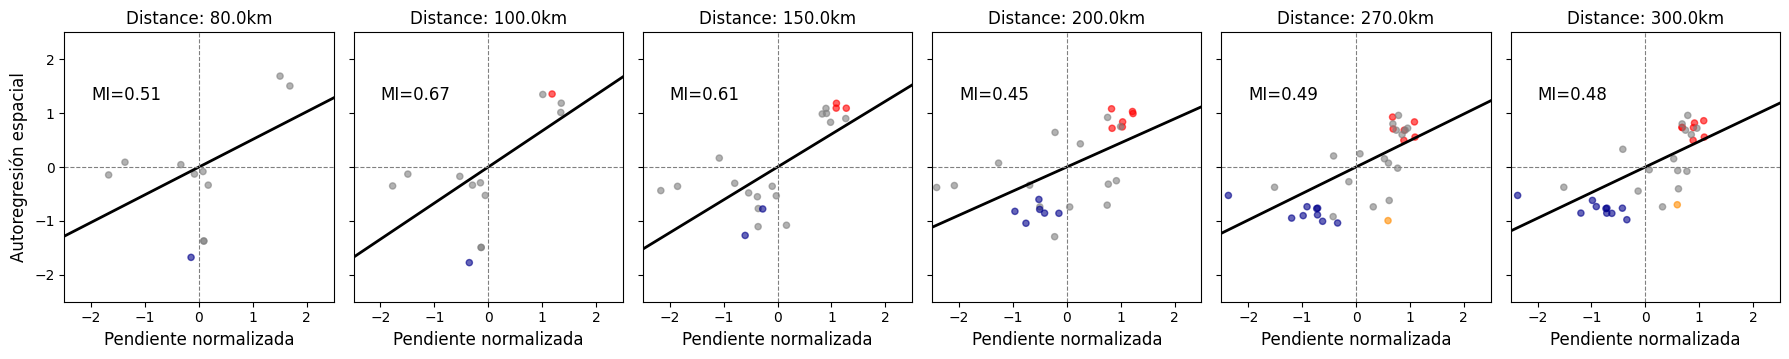

In [251]:
import numpy as np

distance = [80000, 100000, 150000, 200000, 270000, 300000]
variable = 'Temperatura_media_anual_mean'  # Specify the variable you want to use

# Create a single figure with subplots for different distances
f, ax = plt.subplots(nrows=1, ncols=len(distance), figsize=(18, 6), sharex=True, sharey=True) # Ajustado figsize y sharex/sharey para consistencia

for i, dx in enumerate(distance):
    # Create a DistanceBand weights matrix for the specified distance
    try:
        w_dist = DistanceBand.from_dataframe(gdf, dx, binary=True) # Binary=True es común para Moran I
        
        # Identify islands (disconnected components)
        islands = [k for k, v in w_dist.neighbors.items() if len(v) == 0]

        # Filter out islands from the GeoDataFrame
        if islands:
            cat_filtered = gdf.drop(index=islands)
            w_dist_filtered = DistanceBand.from_dataframe(cat_filtered, dx, binary=True)
        else:
            cat_filtered = gdf
            w_dist_filtered = w_dist
        
        # Normalizar la matriz de pesos por fila (standard row-standardization)
        w_dist_filtered.transform = 'R'

    except ValueError as e:
        print(f"Error al crear matriz de pesos para {dx/1000}km: {e}. Saltando este panel.")
        ax[i].set_title(f'Distance: {dx/1000}km (No data/neighbors)')
        ax[i].set_xlim([-2.5, 2.5])
        ax[i].set_ylim([-2.5, 2.5])
        ax[i].axvline(0, color='gray', linestyle='--')
        ax[i].axhline(0, color='gray', linestyle='--')
        continue # Skip to the next iteration

    # Asegurarse de que el número de observaciones sea suficiente
    if len(cat_filtered) < 2:
        print(f"No hay suficientes observaciones para {dx/1000}km después de filtrar islas. Saltando este panel.")
        ax[i].set_title(f'Distance: {dx/1000}km (Too few obs)')
        ax[i].set_xlim([-2.5, 2.5])
        ax[i].set_ylim([-2.5, 2.5])
        ax[i].axvline(0, color='gray', linestyle='--')
        ax[i].axhline(0, color='gray', linestyle='--')
        continue

    # --- CÁLCULOS PARA LA GRÁFICA DE DISPERSIÓN DE MORAN Y LA LÍNEA ---
    # 1. Estandarizar la variable (Z-scores)
    z = (cat_filtered[variable] - cat_filtered[variable].mean()) / cat_filtered[variable].std()
    
    # 2. Calcular el rezago espacial (WZ)
    w_z = w_dist_filtered.sparse @ z.values

    # 3. Calcular el Índice de Moran Global (MI)
    numerator = np.sum(z * w_z)
    denominator = np.sum(z**2)
    mi_global = numerator / denominator

    # 4. Calcular LISA para obtener los p-valores y determinar la significancia
    lisa = esda.Moran_Local(cat_filtered[variable], w_dist_filtered)
    
    # 5. Colorear los puntos basándose en LISA (cuadrante Y significancia p<=0.05)
    # Extraído de la lógica interna de splot.esda.moran_scatterplot
    p_threshold = 0.05 # Umbral de significancia
    
    # Asignar colores según los cuadrantes y la significancia
    point_colors = np.array(['gray'] * len(z), dtype=object) 
    
    # Cuadrante HH (Alto-Alto) - Rojo
    hh_idx = (z >= 0) & (w_z >= 0) & (lisa.p_sim <= p_threshold)
    point_colors[hh_idx] = 'red'

    # Cuadrante LL (Bajo-Bajo) - Azul Oscuro
    ll_idx = (z < 0) & (w_z < 0) & (lisa.p_sim <= p_threshold)
    point_colors[ll_idx] = 'darkblue'

    # Cuadrante HL (Alto-Bajo) - Naranja
    hl_idx = (z >= 0) & (w_z < 0) & (lisa.p_sim <= p_threshold)
    point_colors[hl_idx] = 'darkorange'

    # Cuadrante LH (Bajo-Alto) - Azul Claro
    lh_idx = (z < 0) & (w_z >= 0) & (lisa.p_sim <= p_threshold)
    point_colors[lh_idx] = 'lightskyblue'

    # Los puntos no significativos (grises) ya están asignados por defecto si no cumplen las condiciones anteriores.

    # --- 6. Graficar los puntos (manualmente) ---
    ax[i].scatter(z, w_z, s=20, c=point_colors, alpha=0.6)
    
    # --- 7. Dibujar la línea de regresión MANUALMENTE (la única línea negra) ---
    x_line = np.array([-2.5, 2.5]) 
    y_line = mi_global * x_line
    ax[i].plot(x_line, y_line, color='k', linestyle='-', linewidth=2)

    # --- El resto de tu código para etiquetas y formato ---
    ax[i].text(-2, 1.5, f'MI={mi_global:.2f}', fontsize=12, horizontalalignment='left', verticalalignment='top')
    ax[i].set_xlabel('Pendiente normalizada', fontsize=12)
    if i == 0:
        ax[i].set_ylabel("Autoregresión espacial", fontsize=12)
    else:
        ax[i].set_ylabel("")
    ax[i].set_title(f'Distance: {dx/1000}km')

    # Set consistent limits and aspect for the scatterplot
    ax[i].set_xlim([-2.5, 2.5])
    ax[i].set_ylim([-2.5, 2.5])
    ax[i].set_aspect('equal', adjustable='box') # CRUCIAL para una visualización correcta de la pendiente

    # Añadimos líneas de referencia
    ax[i].axvline(0, color='gray', linestyle='--', linewidth=0.8)
    ax[i].axhline(0, color='gray', linestyle='--', linewidth=0.8)

# Ajustar el layout y guardar la figura
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajusta el layout para que el título principal no se solape

('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WAR

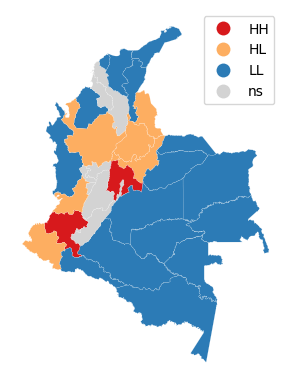

In [252]:
from splot.esda import lisa_cluster

# Create a DistanceBand weights matrix
w_dist80km = DistanceBand.from_dataframe(gdf, 80000, binary=False)

lisa = esda.Moran_Local(gdf['elev_mean'], w_dist80km)
lisa_cluster(lisa, gdf);

# Cluster espacial

La idea básica del agrupamiento estadístico es resumir la información contenida en varias variables creando un número relativamente pequeño de categorías. Luego, cada observación en el conjunto de datos se asigna a una, y solo una, categoría según sus valores para las variables consideradas originalmente en la clasificación.

* k-means: Esta técnica solo requiere como entrada los atributos de las observaciones y el número final de grupos en los que queremos agrupar las observaciones. El algoritmo agrupa las observaciones en un número preespecificado de grupos para que cada observación esté más cerca de la media de su propio grupo que de la media de cualquier otro grupo. 

* Agrupamiento espacial (regionalización): El proceso de creación de regiones se llama regionalización. Una regionalización es un tipo especial de agrupación donde el objetivo es agrupar observaciones que son similares en sus atributos estadísticos, pero también en su ubicación espacial. En este sentido, la regionalización incorpora la misma lógica que las técnicas de agrupación estándar, pero también aplica una serie de restricciones espaciales y/o geográficas. 

In [1]:
var = ['elev_mean',
       'Temperatura_media_anual_mean', 'Precipitacion_anual_mean',
       'Rango_medio_diurno_mean', 'Precipitacion_mes_mas_lluvioso_mean',
       'Precipitacion_mes_mas_seco_mean', 'Isotermalidad_mean',
       'Estacionalidad_de_la_temperatura_mean',
       'Rango_anual_de_temperatura_mean',
       'Estacionalidad_de_la_precipitacion_mean'] 

In [2]:
from sklearn.preprocessing import StandardScaler
gdf_std= StandardScaler().fit_transform(gdf[var])

NameError: name 'gdf' is not defined

In [ ]:
from scipy.cluster.hierarchy import dendrogram,linkage
Z=linkage(gdf_std,method='ward',metric='euclidean')

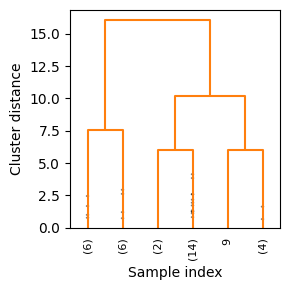

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(3,3))
plt.xlabel('Sample index')
plt.ylabel('Cluster distance');
dendrogram(Z,leaf_rotation=90.,leaf_font_size=8,color_threshold=0.2*83,truncate_mode='lastp',p=6,show_leaf_counts=True,show_contracted=True)
plt.tight_layout()

In [ ]:
from sklearn import cluster

k4cls = cluster.KMeans(n_clusters=4).fit(gdf_std)
gdf['kmeans4'] = k4cls.labels_

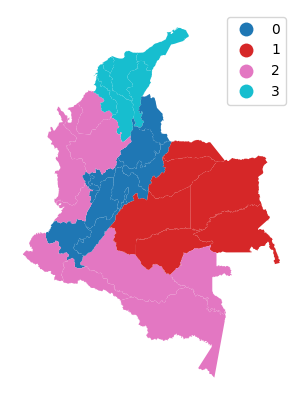

In [ ]:
f, ax = plt.subplots(figsize=(5, 5))
gdf.plot(column='kmeans4', categorical=True, legend=True, linewidth=0, ax=ax)
ax.set_axis_off()

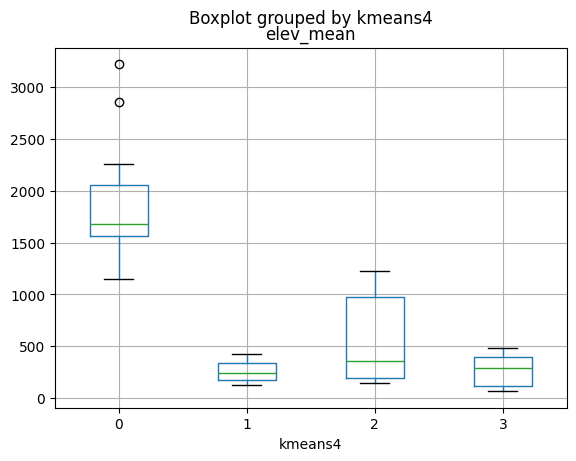

In [ ]:
f,ax=plt.subplots()
gdf.boxplot(column=['elev_mean'], by='kmeans4', ax=ax);

### Ejemplo. MATRIZ DE PESOS BASADA EN LOS K-VECINOS MÁS CERCANOS

In [ ]:
#Matriz de pesos basada en los 4 vecinos más cercanos
from pysal.lib import weights

w_k4 = weights.distance.KNN.from_dataframe(gdf, k=4)

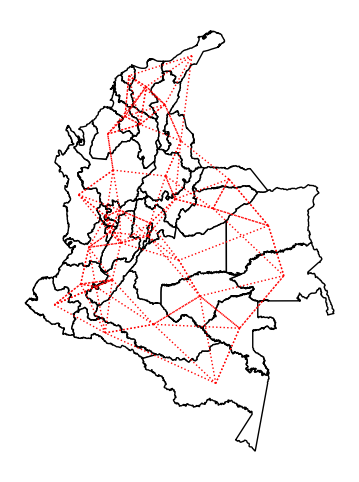

In [ ]:
f, axs = plt.subplots(figsize=(6,6))
ax = gdf.plot(edgecolor="k", facecolor="w", ax=axs)
w_k4.plot(gdf,ax=axs,edge_kws=dict(color="r", linestyle=":", linewidth=1),node_kws=dict(marker=""),)
axs.set_axis_off()

In [ ]:
from sklearn.metrics.cluster import silhouette_score

gdf_k4_wk4 = cluster.AgglomerativeClustering(n_clusters=4, connectivity=w_k4.sparse).fit(gdf_std)
print(silhouette_score(gdf_std,gdf_k4_wk4.labels_))

0.30883796363534394


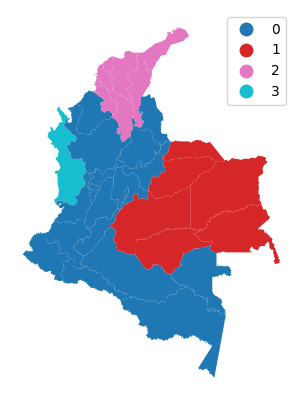

In [ ]:
gdf['knn5'] = gdf_k4_wk4.labels_
f, ax = plt.subplots(1, figsize=(5,5))
gdf.plot(column='knn5', categorical=True, legend=True, linewidth=0, ax=ax)
ax.set_axis_off()